# DNN training on the CIFAR10 dataset

**This project's aim is to build a deep neural network consisting of 20 hidden layers(each of them having 100 units/nodes) and a softmax output layer consisting of 10 nodes, and then training it in different scenarios, observing the performance and concluding the results.** 

The CIFAR10 dataset consists of 60,000 32 by 32 color images that can be categorized under 10 classes, with 6000 images per class. There are 50,000 and 10,000 images in the training set and test set respectively.
The label classes in this dataset are as follows :


*   Airplane
*   Automobile
*   Bird
*   Cat
*   Deer
*   Dog
*   Frog
*   Horse
*   Ship
*   Truck






In [9]:
#importing the necessary libraries
import tensorflow as tf
from matplotlib import pyplot
import keras
import keras.utils
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import AlphaDropout
from keras.optimizers import Nadam
from sklearn.preprocessing import StandardScaler

# Fetching cifar10 dataset and extracting relevant information from it

In [10]:
#fetching CIFAR10 dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
#converting to one hot encodings
Y_train,Y_test = to_categorical(Y_train),to_categorical(Y_test)
#converting into 2D matrix of the dimensional form (m,n) where m = no. of examples and n = no. of features      
X_train,X_test = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])),X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))
#normalizing train and test images
X_train_norm,X_test_norm = X_train.astype('float32')/255.0,X_test.astype('float32')/255.0
#create scaler
scaler = StandardScaler()
#fit scaler on data
stdTrain = scaler.fit_transform(X_train_norm)
stdTest = scaler.fit_transform(X_test_norm)
#inverse transform
X_train_std = scaler.inverse_transform(stdTrain)
X_test_std = scaler.inverse_transform(stdTest)
print(X_train_std[0,700],X_train_norm[0,700])
#printing initial relevant information 
print('Total no. of training examples =',X_train.shape[0])
print('Total no. of test examples =',X_test.shape[0])
print('Total no. of classes/labels/categories =',Y_train.shape[1])
print('Final dimensions of X_train =',X_train.shape)
print('Final dimensions of Y_train =',Y_train.shape)
print('Final dimensions of X_test =',X_test.shape)
print('Final dimensions of Y_test =',Y_test.shape)

0.35791546 0.34901962
Total no. of training examples = 50000
Total no. of test examples = 10000
Total no. of classes/labels/categories = 10
Final dimensions of X_train = (50000, 3072)
Final dimensions of Y_train = (50000, 10)
Final dimensions of X_test = (10000, 3072)
Final dimensions of Y_test = (10000, 10)


# (1)Building a baseline model for our DNN

This is the basic architecture of a neural network. The input layer is nothing but the feature vector of our dataset.All the layers between the input layer and the output layer make up the hidden layer. Each unit is a node, which is analogous to a neuron.In fact, this model is very much inspired from the biological neural network.Analogous to the neurons processing data to give meaningful information, the nodes can also be thought of as computational units which actually applies an activation function to the net input coming to it,giving the activated output.  

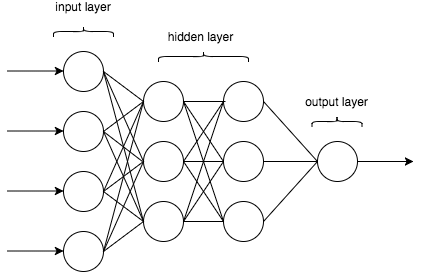


An informative research paper regarding Deep Learning:
Jürgen Schmidhuber,
Deep learning in neural networks: An overview,
Neural Networks,
Volume 61,
2015,
Pages 85-117,
ISSN 0893-6080,
https://doi.org/10.1016/j.neunet.2014.09.003.
(http://www.sciencedirect.com/science/article/pii/S0893608014002135)

The mechanism of the computation of an activation function by a node is depicted in the following figure.

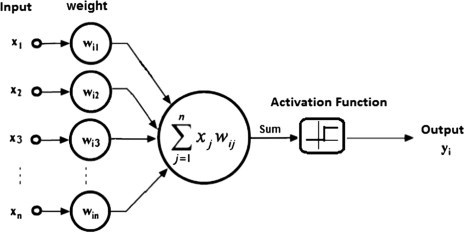

From the figure above,one can infer that a node does two functions sequentially,the first one is performing summation on the weighted inputs,and secondly applying activation functions on it.

In [ ]:
def dnn_model1():    #baseline model
  model = Sequential()
  model.add(Dense(100, input_dim=X_train.shape[1], activation='elu', kernel_initializer='he_uniform'))  #hidden layer1       he random initialization for our weights 
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer2
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer3
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer4
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer5
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer6
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer7
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer8
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer9
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer10
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer11
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer12
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer13
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer14
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer15
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer16
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer17
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer18
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer19
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer20
  model.add(Dense(Y_train.shape[1], activation='softmax'))   #output layer 
  Opt = Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99, epsilon=1e-07, name='Nadam')
  model.compile(optimizer=Opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
    

**Activation functions are mathematical equations that determine the output of a neural network. The purpose of activation function is to introduce non-linearity in the output of the neuron.** A neural network without activation functions is just linear regression.

There are many choices when it comes to decide an activation function suitable for our network. Some of them are shown as follows:

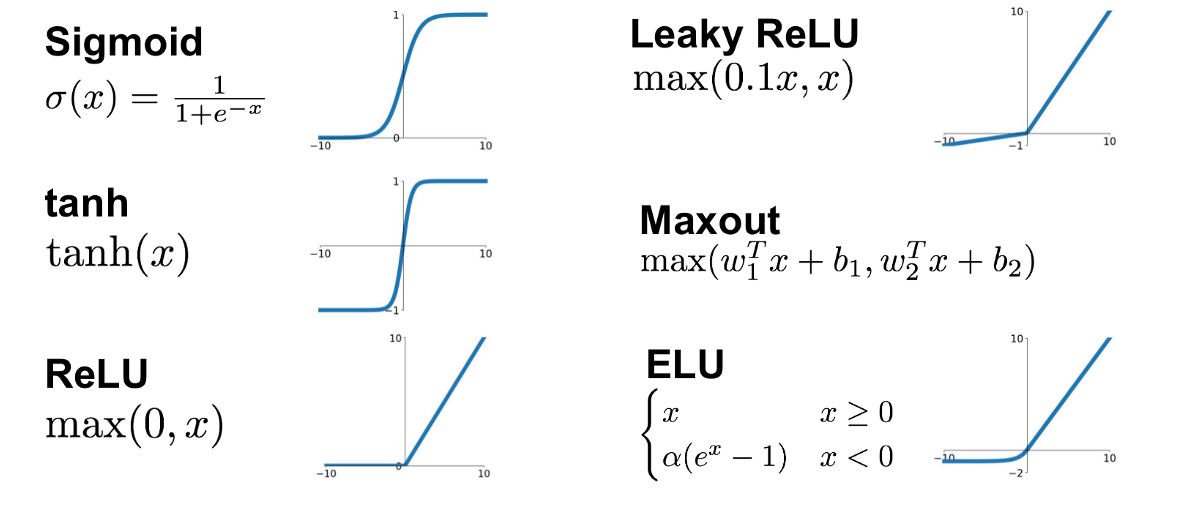

**Elu(Exponential Linear Unit) is shown in the figure above.It's advantage over ReLU is that it does not suffer from the problem of dying neurons,exploding and vanishing gradients.**

**Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.**The algorithms aim at adjusting the weights such that the loss function is minimum. Gradient descent is one of the most basic optimizers in the field of machine learning.There are many other optimized algorithms out there like RMS prop,Adam,Nadam among others.In this project we have used Nadam optimizer.

When building a neural network,**initializing the weights effectively is very important.You initialize them to small random numbers,but note that you can definitely not initialize them to zero because it would lead the nodes learning the exactly same features during training.**While initializing the weights you have to make sure that you do not run into a problem due to exploding gradients(too large initialization) or vanishing gradients(too small initialization).There are many initializers like Xavier,He_uniform etc. Our aim should generally be to choose an initializer such that the mean of activations is zero and the variance of activations across all the layers stays the same.

deeplearning.ai guide on choosing a initializer:
https://www.deeplearning.ai/ai-notes/initialization/

In [11]:
def plot_learning_curves(history):
#plotting learning curves 
  #plot accuracy for train and test sets
  pyplot.subplot(211)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='training_set')
  pyplot.plot(history.history['val_accuracy'], color='red', label='test set')
  #plot cross entropy loss for train and test sets
  pyplot.subplot(212)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='training_set')
  pyplot.plot(history.history['val_loss'], color='red', label='test set')


In [ ]:
def scenario_1a():      #baseline model,without early stopping
  #defining model
  model = dnn_model1()
  #fitting model
  history = model.fit(X_train_norm, Y_train, epochs=150, validation_data=(X_test_norm, Y_test), verbose=0) #128#1000
  #evaluating model
  _, train_accuracy = model.evaluate(X_train_norm, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =', test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

train accuracy = 0.907260000705719
test accuracy = 0.47290000319480896


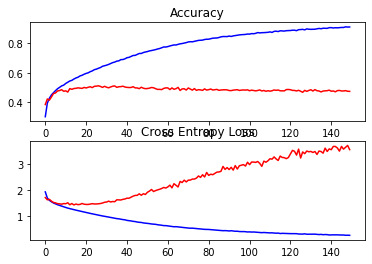

In [ ]:
scenario_1a()  #baseline model 

**Inferences:** The test accuracy is very low as compared to the train accuarcy.The reason behind it is overfitting.**Overfitting is identified when the model fits the training set very well but so is not the case of fitting the test set.**.The large no. and size of layers are causing this problem of high variance.

# (2)Implementing Early Stopping

**Early stopping is a technique that helps stopping the training of neural networks at the right time.** Numerous epochs can lead to overtraining and therefore overfitting.We can halt the training in the middle by monitoring the desirable metric,which in general is the validation loss.It allows us to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

An informative research paper regarding Early Stopping:
https://www.researchgate.net/publication/2874749_Early_Stopping_-_But_When
Prechelt, Lutz. (2000). Early Stopping - But When?. 10.1007/3-540-49430-8_3. 

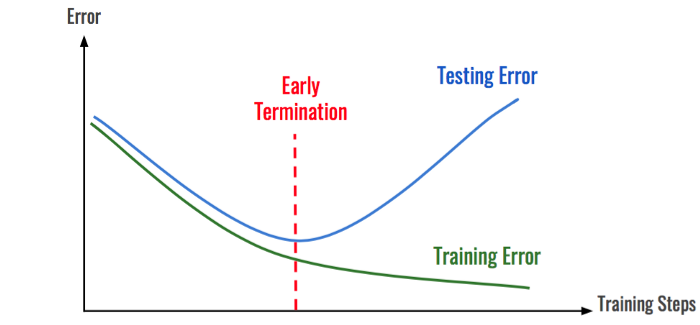

In [ ]:
def scenario_1b():      #baseline model,batch size=128,early stopping implemented
  #defining model
  model = dnn_model1()
  #implementing early stopping
  e_s = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
  #fitting model
  history = model.fit(X_train, Y_train, epochs=200, batch_size=128, validation_data=(X_test, Y_test), verbose=0, callbacks=[e_s]) #128#1000
  #evaluating model
  _, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =', test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

Epoch 00072: early stopping
train accuracy = 0.6329600214958191
test accuracy = 0.45500001311302185


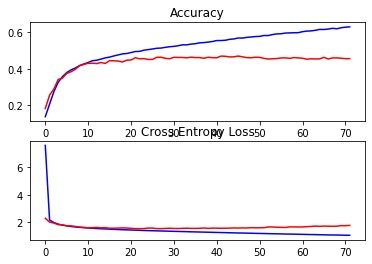

In [ ]:
scenario_1b()

**Inference:** Here we have set the batch size to 128 and have implemented early stopping.Patience parameter has been set to 50 which means that if at a point,we see no further improvement in the model performance,wait and ensure that there actually is no scope of imrovement for the next 50 epochs also.
We have trained a generalized model,managed to reduce overfitting(high variance).

# (3)Applying Batch Normalization

**Batch normalization is a method used to make artificial neural networks speedy and more stable through normalization of the inputs of a layer by recentering and reschaling.** It means you have standardized mean and variance(mean=0,variance=1),this results in the reduction of the amount by which the distribution of the hidden unit values shift around(covariance shift).This is the reason behind stability and fast training.The second slight effect of Batch normalization is regularization.Since each mini-batch is scaled by the mean and varience computed just on that minibatch,similar to dropout regularization,some noise is added to each hidden layer's output,which leads to a slight regularization effect.
There are usually two types in which Batch Normalization can be applied:


1.   Before activation function
2.   After activation function

Though in the original paper, Batch Normalization is applied before applying activation.In this project,we have applied batch normalization after activation.



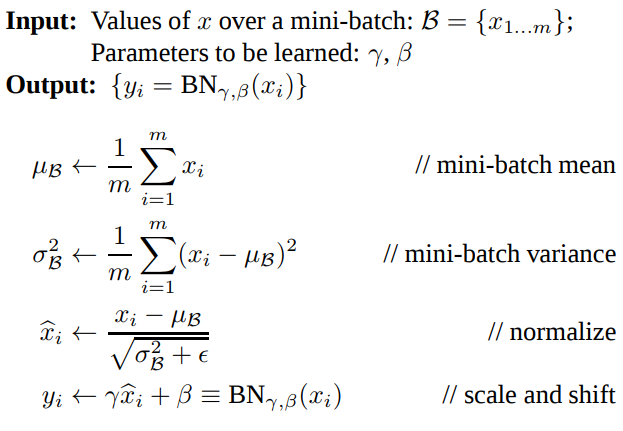

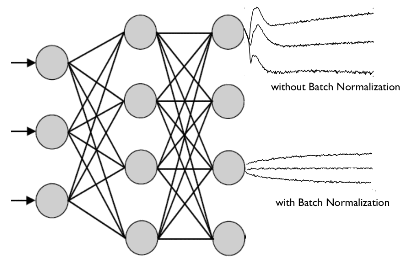

An informative research paper regarding Batch Normalization by Google:

static.googleusercontent.com/media/research.google.com/en//pubs/archive/43442.pdf

In [ ]:
def dnn_model2():    #batch normalization
  model = Sequential()
  model.add(Dense(100, input_dim=X_train.shape[1], activation='elu', kernel_initializer='he_uniform'))  #hidden layer1       he random initialization for our weights 
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer2
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer3
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer4
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer5
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer6
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer7
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer8
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer9
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer10
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer11
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer12
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer13
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer14
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer15
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer16
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer17
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer18
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer19
  model.add(BatchNormalization())
  model.add(Dense(100, activation='elu', kernel_initializer='he_uniform'))  #hidden layer20
  model.add(BatchNormalization())
  model.add(Dense(Y_train.shape[1], activation='softmax'))   #output layer 
  Opt = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-07, name='Nadam')
  model.compile(optimizer=Opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
    

**Without Early Stopping**

In [ ]:
def scenario_3a():   #batch normalization
  #defining model
  model = dnn_model2()
  #fitting model
  history = model.fit(X_train_norm, Y_train, epochs=500, validation_data=(X_test_norm, Y_test), verbose=0)
  #evaluating model
  _,train_accuracy = model.evaluate(X_train_norm, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =',test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

train accuracy = 0.9276599884033203
test accuracy = 0.5019999742507935


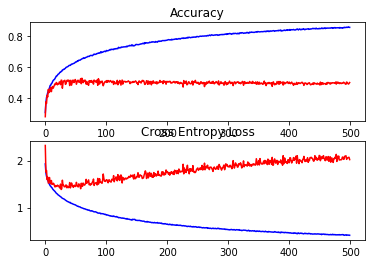

In [ ]:
scenario_3a()   #batch normalization

**Inferences:** In the learning curves above, you will notice that the graph is less spiky,stable and we could manage to increase the iterations to 500 due to speedy learning,our test accuracy has gone up a bit.We have also increased the learning rate by 10 times as batch normalization ensures that there's no activation that has gone really high or really low.

**With Early Stopping**

In [ ]:
def scenario_3b():   #batch normalization with early stopping
  #defining model
  model = dnn_model2()
  #implementing early stopping
  e_s = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
  #fitting model
  history = model.fit(X_train_norm, Y_train, epochs=500, validation_data=(X_test_norm, Y_test), verbose=0, callbacks=[e_s])
  #evaluating model
  _,train_accuracy = model.evaluate(X_train_norm, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =',test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

Epoch 00082: early stopping
train accuracy = 0.7336000204086304
test accuracy = 0.5156000256538391


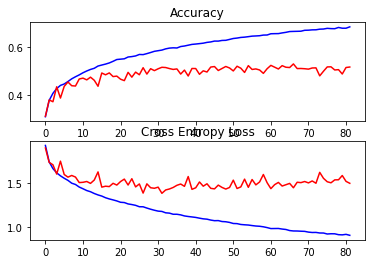

In [ ]:
scenario_3b()

**Inferences:** We have solved the issue of overfitting to a great extent.

# (3)Replacing Batch Normalization with selu activation

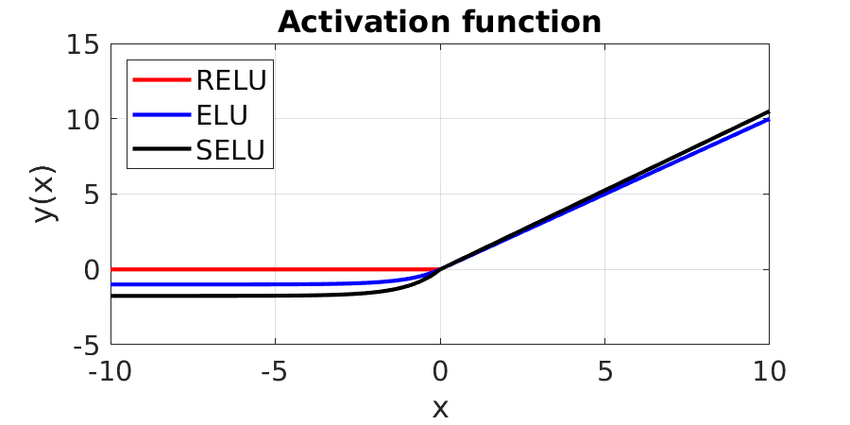

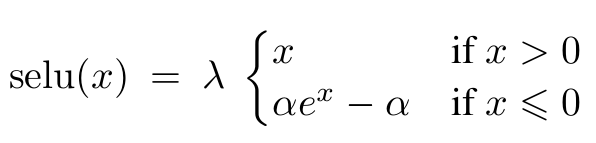

**Selu is nothing but scaled ELU.** It has a great property of self normalization,there is no fear of vanishing gradients.The reason that accounts for it is that we have both positive and negative values(enabling mean shifting).The parameter lambda accounts for the word "Scaled" in Scaled Exponential Linear Unit.The implementations in Tensorflow use the value from original paper which is about 1.0507.

In [ ]:
def dnn_model3():    #selu activation
  model = Sequential()
  
  model.add(Dense(100, input_dim=X_train.shape[1], activation='selu', kernel_initializer='lecun_normal'))  #hidden layer1       he random initialization for our weights
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer2

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer3

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer4

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer5
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer6
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer7
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer8

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer9
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer10

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer11
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer12
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer13

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer14
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer15
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer16
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer17
  
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer18

  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer19
            
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer20
          


  model.add(Dense(Y_train.shape[1], activation='softmax'))   #output layer 
  Opt = Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99, epsilon=1e-07, name='Nadam')
  model.compile(optimizer=Opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
    

**Without Early Stopping**

In [ ]:
def scenario_4a():   #selu activation,BatchNorm
  #defining model
  model = dnn_model3()
  #fitting model
  history = model.fit(X_train_std, Y_train, epochs=150, validation_data=(X_test_std, Y_test), verbose=0)#epochs=100
  #evaluating model
  _,train_accuracy = model.evaluate(X_train_std, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_std, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =',test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

train accuracy = 0.9304199814796448
test accuracy = 0.47929999232292175


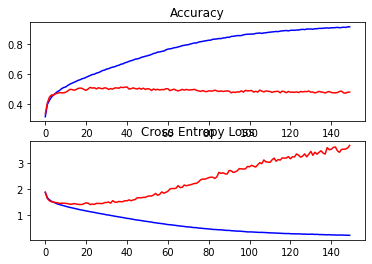

In [ ]:
scenario_4a()   

**Inferences:** We must notice that without even using batch normalzation, we have trained a model comparable to the one we trained using batch normalization.The selu activation and lecun normal initializer accounts for it.

**With Early Stopping**

In [ ]:
def scenario_4b():   #selu activation and LeCun normal initialization
  #defining model
  model = dnn_model3()
  #implementing early stopping
  e_s = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
  #fitting model
  history = model.fit(X_train_std, Y_train, epochs=150, validation_data=(X_test_std, Y_test), verbose=0, callbacks=[e_s])#epochs=100
  #evaluating model
  _,train_accuracy = model.evaluate(X_train_std, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_std, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =',test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)


Epoch 00066: early stopping
train accuracy = 0.7987599968910217
test accuracy = 0.49070000648498535


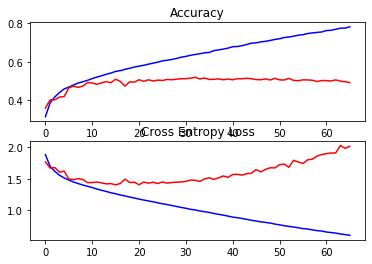

In [ ]:
scenario_4b()

**Inferences:** We have trained a model that is much more generalized than the previous one.Again one may notice how early stopping has helped us resolve the issue of overfitting.

# (5)Implementing Alpha Dropout

**In dropout regularization some nodes are eliminated randomly during training the neural network. Whether a node has to be eliminated or not depends on the "keep" probability that we are supposed to specify.** For example, if for a hidden layer "keep" probablity equals 0.7 i.e. the "discard" probability or "drop" probability equals 0.3.This means that there is a 30% chance of elimination.


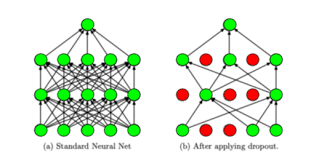

This technique will have an effect of shrinking the squared norm of the weights, which will in turn help us prevent overfitting.
**Alpha Dropout is one such variant of dropout techniques.It is a Dropout that keeps mean and variance of inputs to their original values, in order to ensure the self-normalizing property even after this dropout.**

An informative research paper regarding Dropout regularization:
https://www.researchgate.net/publication/286794765_Dropout_A_Simple_Way_to_Prevent_Neural_Networks_from_Overfitting
Srivastava, Nitish & Hinton, Geoffrey & Krizhevsky, Alex & Sutskever, Ilya & Salakhutdinov, Ruslan. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Journal of Machine Learning Research. 15. 1929-1958. 

In [12]:
def dnn_model4():    #alpha dropout
  model = Sequential()
  
  model.add(Dense(100, input_dim=X_train.shape[1], activation='selu', kernel_initializer='lecun_normal'))  #hidden layer1       he random initialization for our weights
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))   
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer2
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))   
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer3
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer4
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer5
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer6
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer7
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer8
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer9
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer10
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer11
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer12
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer13
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer14
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer15
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer16
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer17
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer18
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer19
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.05))          
  model.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))  #hidden layer20
  model.add(BatchNormalization())
  model.add(AlphaDropout(0.02))        


  model.add(Dense(Y_train.shape[1], activation='softmax'))   #output layer 
  Opt = Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99, epsilon=1e-07, name='Nadam')
  model.compile(optimizer=Opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
    

**Without Early Stopping**

In [15]:
def scenario_5a():   #alpha dropout
  #defining model
  model = dnn_model4()
  #fitting model
  history = model.fit(X_train_std, Y_train, epochs=150, validation_data=(X_test_std, Y_test), verbose=0)
  #evaluating model
  _,train_accuracy = model.evaluate(X_train_std, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_std, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =',test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

train accuracy = 0.6973599791526794
test accuracy = 0.5138000249862671


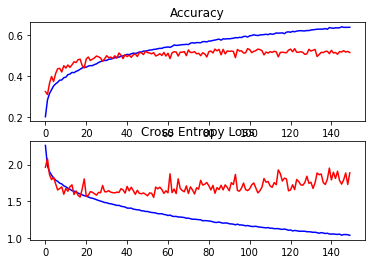

In [16]:
scenario_5a()

**Inferences:** Our model has improved a lot in terms of test accuracy and issue of overfitting.This is the result of dropout regularization. We can obtain the best test accuracy by using early stopping technique which is shown next. 

**With Early Stopping**

In [13]:
def scenario_5b():   #alpha dropout, BatchNorm
  #defining model
  model = dnn_model4()
  #implementing early stopping
  e_s = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

  #fitting model
  history = model.fit(X_train_norm, Y_train, epochs=150, validation_data=(X_test_norm, Y_test), verbose=0,callbacks=[e_s])#epochs=100
  #evaluating model
  _,train_accuracy = model.evaluate(X_train_norm, Y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
  print('train accuracy =',train_accuracy)
  print('test accuracy =',test_accuracy)
  #plotting learning curves
  plot_learning_curves(history)

Epoch 00068: early stopping
train accuracy = 0.6194199919700623
test accuracy = 0.524399995803833


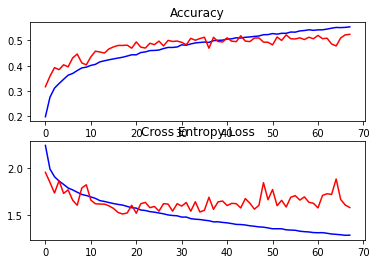

In [14]:
scenario_5b()

**Inferences:** Early stopping has helped us prevent overfitting(high variance) issue.We have got the best test accuracy till now.The train accuracy is reduced because we have used dropout regularization as well as prevented overtraining.